<a href="https://colab.research.google.com/github/25stu0501-cell/opencv-25-10-29/blob/main/image_face_detect_simple_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 URL을 입력하세요: https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/5389/live/3f9b0980-9a7d-11f0-97f5-bd38218a3641.jpg.webp


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

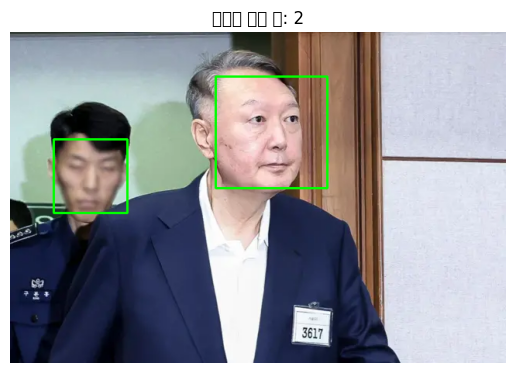

In [1]:
# --- 1. 라이브러리 설치 ---
!pip install opencv-python-headless requests

import cv2, requests
import numpy as np
from matplotlib import pyplot as plt

# --- 2. 이미지 URL 입력 ---
url = input("이미지 URL을 입력하세요: ").strip()
img_arr = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
img = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)

# --- 3. Haar Cascade 불러오기 ---
!wget -q https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# --- 4. 얼굴 검출 ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# --- 5. 얼굴에 네모 표시 ---
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

# --- 6. 결과 출력 ---
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"인식된 얼굴 수: {len(faces)}")
plt.axis("off")
plt.show()


더 간단한 버전